# Transform Your Documents into AI-Ready Data with Docling


## Lab 1: Document Conversion

Welcome to the first lab in our comprehensive Docling workshop series! This three-part journey will take you from document processing basics to building cutting-edge, transparent AI systems.

## Overview: What You'll Build

In this first lab, you'll learn how to transform complex documents into AI-ready structured data. But this isn't just about extraction - it's about intelligent conversion that preserves everything important for downstream AI applications.

### By the End of This Lab

You'll have mastered:
- **Document Loading**: Ingesting PDFs, Word docs, PowerPoints, and more
- **Structure Extraction**: Preserving hierarchy and relationships
- **Table Excellence**: Converting complex tables into usable formats
- **Image Handling**: Extracting and preparing images for AI processing
- **Metadata Preservation**: Maintaining information needed for visual grounding

---

## Introduction

**[Docling](https://docling-project.github.io/docling/)** is an open-source toolkit for document processing, parsing, and conversion designed for generative AI applications.

### Key Features
- **Multi-format support**: PDF, DOCX, XLSX, HTML, images, and more
- **Advanced PDF understanding**: Page layout, reading order, table structure, code blocks, formulas
- **Unified DoclingDocument representation**: Consistent data structure across all formats
- **Flexible export options**: Markdown, HTML, JSON, DocTags
- **Local execution**: Process sensitive data without external services
- **Framework integration**: LangChain, LlamaIndex, and other AI frameworks

## Why we use Docling for Document Conversion

Data is the foundation for all AI systems. In order to leverage as much data as possible, we need to be able to ingest data of various formats with accuracy. Howver, LLM's typically requre data in a specific format, thus the need for conversion.

**Without proper conversion**:
- Information gets lost or jumbled
- Tables become unreadable text
- Images disappear entirely
- Document structure is destroyed

**With Docling's advanced conversion**:
- Every piece of information is preserved
- Tables maintain their structure
- Images are extracted and processable
- Layout and relationships are understood

## Installation and Setup

### Setting up the environment

Ensure you are running Python 3.10 or later in a freshly created virtual environment.

In [ ]:
import sys
assert sys.version_info >= (3, 10) and sys.version_info < (3, 14), "Use Python 3.10, 3.11, 3.12, or 3.13 to run this notebook."

### Basic Installation

In [ ]:
! echo "::group::Install Dependencies"
%pip install uv
! uv pip install "docling[vlm]" docling matplotlib pillow pandas ipywidgets python-dotenv
! echo "::endgroup::"

### Import Essential Components




In [ ]:
from pathlib import Path

# Core Docling imports
from docling.document_converter import DocumentConverter
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import PdfFormatOption

# For advanced features
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem, TextItem, DoclingDocument

# For data processing and visualization
import matplotlib.pyplot as plt

# Create output directory
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

## Basic Document Conversion

### Minimal Example

The simplest way to convert a document:

In [ ]:
# example document: Docling Technical Report
docling_paper = "https://arxiv.org/pdf/2501.17887"

In [ ]:
# Simple conversion

# Create a converter instance
converter = DocumentConverter()

# Convert a document
result = converter.convert(docling_paper)
doc = result.document

In [ ]:
# Export to Markdown
md_out = doc.export_to_markdown()

# printing an excerpt
print(f"{md_out[:2000]}...")

### Document Structure Exploration

One of Docling's superpowers is understanding document structure. This becomes critical in Lab 2 (chunking) and Lab 3 (visual grounding).

Let's explore what Docling discovers:


In [ ]:
# Document metadata - important for tracking
print(f"Document title: {doc.name}")
print(f"Number of pages: {len(doc.pages)}")
print(f"Number of tables: {len(doc.tables)}")
print(f"Number of pictures: {len(doc.pictures)}")

# Explore the document structure
print("\nDocument structure:")
for i, (item, level) in enumerate(doc.iterate_items()):
    if i < 10:  # Show first 10 items
        item_type = type(item).__name__
        text_preview = item.text[:200] if hasattr(item, 'text') else 'N/A'
        print(f"{'  ' * level}{item_type}: {text_preview}")

## Export Formats and Options

Docling supports multiple export formats with various options:


In [ ]:
# Export to different formats (various options available, but called with default ones)
markdown_text = doc.export_to_markdown()
html_text = doc.export_to_html()
json_dict = doc.export_to_dict()
doc_tags = doc.export_to_doctags()

# Save different formats (various options available, some shown)
doc.save_as_markdown(
    output_dir / "document.md",
    image_mode=ImageRefMode.PLACEHOLDER,
    image_placeholder="<!-- my image placeholder -->",
    # ...
)

# ...

# Export as JSON
doc.save_as_json(
    output_dir / "document.json",
)

## Working with Tables

Docling provides excellent table extraction capabilities, for this example, let's use a document with more tables, found [here](https://midwestfoodbank.org/images/AR_2020_WEB2.pdf)

### Basic Table Export

In [ ]:
# example document with tables
tables_example = "https://arxiv.org/pdf/2502.09927"

In [ ]:
# Convert a document with tables
table_result = converter.convert(tables_example)
table_doc = table_result.document

In [ ]:
print(f"\nDocument contains {len(table_doc.tables)} tables")

# Export all tables
for table_idx, table in enumerate(table_doc.tables):
    # Convert to pandas DataFrame
    df = table.export_to_dataframe()

    print(f"\n## Table {table_idx}")
    print(f"Shape: {df.shape}")
    display(df.head())

    # Save as CSV
    df.to_csv(output_dir / f"table_{table_idx}.csv", index=False)

    # Save as HTML
    with open(output_dir / f"table_{table_idx}.html", "w") as fp:
        fp.write(table.export_to_html(doc=table_doc))

## Image and Figure Extraction

Docling also provides image extraction capabilities

### Extracting and Visualizing Page Images

In [ ]:
# Configure pipeline to extract images
IMAGE_RESOLUTION_SCALE = 2.0  # 2x resolution (144 DPI)

pipeline_options = PdfPipelineOptions(
    images_scale=IMAGE_RESOLUTION_SCALE,
    generate_page_images=True,
    generate_picture_images=True,
)

converter_with_images = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

# Convert with image extraction
img_result = converter_with_images.convert(docling_paper)
img_doc = img_result.document

In [ ]:
# Create images subdirectory
images_dir = output_dir / "images"
images_dir.mkdir(exist_ok=True)

# Save page images
for page_no, page in img_doc.pages.items():
    page_image_filename = images_dir / f"page_{page_no}.png"
    with page_image_filename.open("wb") as fp:
        page.image.pil_image.save(fp, format="PNG")

print(f"Saved {len(img_doc.pages)} page images")

### Extract Figures and Tables as Images

For custom processing, we can also extract figures and tables as images:

In [ ]:
# Extract all figures and tables as separate images
table_counter = 0
picture_counter = 0

for element, level in img_doc.iterate_items():
    if isinstance(element, TableItem):
        table_counter += 1
        image_filename = images_dir / f"table_{table_counter}.png"
        with image_filename.open("wb") as fp:
            element.get_image(img_doc).save(fp, "PNG")

    elif isinstance(element, PictureItem):
        picture_counter += 1
        image_filename = images_dir / f"figure_{picture_counter}.png"
        with image_filename.open("wb") as fp:
            element.get_image(img_doc).save(fp, "PNG")

print(f"Extracted {table_counter} tables and {picture_counter} figures as images")

### Inspecting Picture Content

Docling will automatically generate captions and extract text content from extracted images. Let's take a look at what is extracted:

In [ ]:
def inspect_pictures_with_images(doc: DoclingDocument, image_size=(6, 4)):
    """Display pictures inline with their text content"""
    for idx, picture in enumerate(doc.pictures):
        print(f"\n{'='*60}")
        print(f"Picture {idx}")
        print(f"{'='*60}")

        # Display the image
        try:
            img = picture.get_image(doc)
            if img:
                plt.figure(figsize=image_size)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Picture {idx}")
                plt.show()
        except Exception as e:
            print(f"Could not display image: {e}")

        # Display metadata
        caption = picture.caption_text(doc)
        if caption:
            print(f"\nCaption: {caption}")

        if hasattr(picture, 'prov') and picture.prov:
            print(f"Location: Page {picture.prov[0].page_no}")

        # Display embedded text
        print("\nEmbedded text elements:")
        text_found = False
        for item, level in doc.iterate_items(root=picture, traverse_pictures=True):
            if isinstance(item, TextItem):
                print(f"{'  ' * (level + 1)}- {item.text}")
                text_found = True

        if not text_found:
            print("  (No text elements found)")

# Use the simple inline display
inspect_pictures_with_images(img_doc)

### Visualizing Document Layout with Bounding Boxes

In order to understand how each part of the document is extracted, let's visualize the extracted elements.

We can do that by using one of Docling's built-in visualizers:

In [ ]:
from docling_core.transforms.visualizer.layout_visualizer import LayoutVisualizer

layout_visualizer = LayoutVisualizer()
page_images = layout_visualizer.get_visualization(doc=img_doc)

num_pages_to_viz = 2  # first N pages to visualize
pages_to_viz = list(page_images.keys())[:num_pages_to_viz]
for page in pages_to_viz:
    display(page_images[page])

## Advanced Features: Enrichment


For using vision-language models we have multiple options

1. Docling runs the models locally
1. Call a local inference server like Ollama and LM Studio
1. Use a remote provider offering an openai-compatible api. For the workshop we have the possibility to use a small credit on Replicate. In order to convert the Replicate API to openai-compatible we will launch the LiteLLM proxy.

In [26]:
import urllib.request
import urllib.error

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

def is_ollama_available(url="http://localhost:11434"):
    """Check if Ollama is running and accessible."""
    try:
        req = urllib.request.Request(url, method="GET")
        with urllib.request.urlopen(req, timeout=2) as response:
            return response.status == 200
    except (urllib.error.URLError, TimeoutError):
        return False

OLLAMA_AVAILABLE = is_ollama_available()

# Prefer Ollama if available (better memory management), otherwise fall back to local VLM
RUN_LOCAL_OLLAMA = not IN_COLAB and OLLAMA_AVAILABLE
RUN_LOCAL_VLM = not IN_COLAB and not OLLAMA_AVAILABLE

print(f"Environment: {'Colab' if IN_COLAB else 'Local'}")
print(f"Ollama available: {OLLAMA_AVAILABLE}")
print(f"Using: {'Ollama' if RUN_LOCAL_OLLAMA else 'Local VLM' if RUN_LOCAL_VLM else 'Remote'}")

Environment: Local
Ollama available: True
Using: Ollama


### Picture Classification and Description

Beyond basic captioning capabilities, Docling is also able to process images using multimodal LLM's. This will give us more indepth picture descriptions to help us leverage image data more effectively.

Let's set up our Display function:

In [ ]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython.display import HTML

def display_enriched_document(enr_doc: DoclingDocument):
    html_buffer = []
    # display the first 5 pictures and their captions and annotations:
    for pic in enr_doc.pictures[:5]:
        html_item = (
            f"<h3>Picture <code>{pic.self_ref}</code></h3>"
            f'<img src="{pic.image.uri!s}" /><br />'
            f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
        )
        for annotation in pic.meta:
            if not isinstance(annotation, PictureDescriptionData):
                continue
            html_item += (
                f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
            )
        html_buffer.append(html_item)
    display(HTML("<hr />".join(html_buffer)))

And try this with the integrated granite-vision model:

#### Fix for Apple Silicon (MPS) bfloat16 Issue

Docling's local VLM uses `bfloat16` which isn't fully supported on Apple Silicon MPS, causing garbled output. This patch uses `float16` instead:

In [ ]:
import platform
import torch

# Patch Docling's VLM model to use float16 on Apple Silicon (MPS)
if "darwin" in platform.system().lower() and "arm64" in platform.machine().lower():
    import docling.models.stages.picture_description.picture_description_vlm_model as vlm_module
    
    _original_init = vlm_module.PictureDescriptionVlmModel.__init__
    
    def _patched_init(self, enabled, enable_remote_services, artifacts_path, options, accelerator_options):
        # Temporarily patch torch.bfloat16 to torch.float16 for MPS compatibility
        original_bfloat16 = torch.bfloat16
        torch.bfloat16 = torch.float16
        try:
            _original_init(self, enabled, enable_remote_services, artifacts_path, options, accelerator_options)
        finally:
            torch.bfloat16 = original_bfloat16
    
    vlm_module.PictureDescriptionVlmModel.__init__ = _patched_init
    print("✓ Patched Docling VLM to use float16 on Apple Silicon")
else:
    print("✓ Not on Apple Silicon - no patch needed")

In [ ]:
from docling.datamodel.pipeline_options import PictureDescriptionVlmOptions

# Configure enrichment pipeline
if RUN_LOCAL_VLM:
    # Configure enrichment pipeline
    enrichment_options = PdfPipelineOptions(
        do_picture_description=True,
        picture_description_options=PictureDescriptionVlmOptions(  # model & prompt choice
            repo_id="ibm-granite/granite-vision-3.2-2b",
            prompt="Give a detailed description of what is depicted in the image",
        ),
        generate_picture_images=True,
        images_scale=2.0,
    )

    converter_enriched = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=enrichment_options)
        }
    )

    enr_result = converter_enriched.convert(docling_paper)
    enr_doc = enr_result.document

    display_enriched_document(enr_doc)

We can also run it using an OpenAI-compatible API like Ollama.

/var/folders/4v/2zwbdy893_b18hmfvqsrm_pw0000gn/T/ipykernel_5061/2062233220.py:13: DeprecationWarning: Field `annotations` is deprecated; use `meta` instead.
  for annotation in pic.annotations:



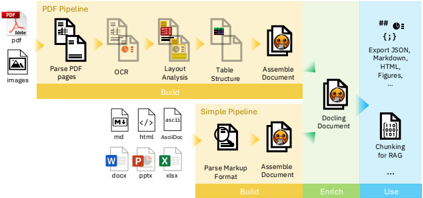
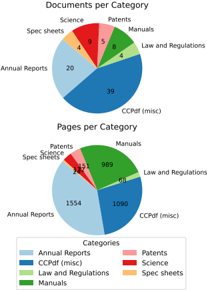
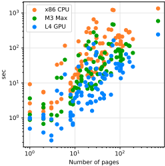
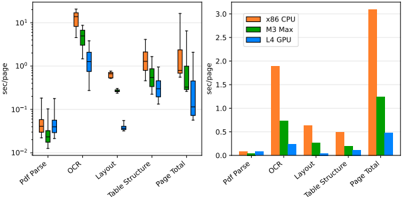
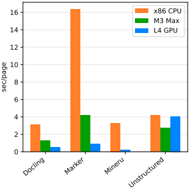

In [27]:
from docling.datamodel.pipeline_options import PictureDescriptionApiOptions

if RUN_LOCAL_OLLAMA:
    # Configure enrichment pipeline
    enrichment_options = PdfPipelineOptions(
        do_picture_description=True,
        enable_remote_services = True,
        picture_description_options=PictureDescriptionApiOptions(
            url="http://localhost:11434/v1/chat/completions",
            params={
                "model": "granite3.2-vision:2b",
                "max_completion_tokens": 200,
            },
            prompt="Give a detailed description of what is depicted in the image",
            timeout=60,
        ),
        generate_picture_images=True,
        images_scale=1.0,
    )

    converter_enriched = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=enrichment_options)
        }
    )

    enr_result = converter_enriched.convert(docling_paper)
    enr_doc = enr_result.document

    display_enriched_document(enr_doc)

## Visual Language Models (VLMs)

A recent feature of Docling is the use of a single shot VLM to process documents. This means that instead the traditional conversion pipeline, we send the docment to a custom tuned VLM that can extract all the content directly.


### Using SmolDocling

[SmolDocling](https://huggingface.co/ds4sd/SmolDocling-256M-preview) is a compact (256M parameters) vision-language model for document conversion:

In [ ]:
import platform
from docling.datamodel.pipeline_options import (  # Additional imports for VLM
    VlmPipelineOptions,
    smoldocling_vlm_conversion_options,
    smoldocling_vlm_mlx_conversion_options,
)
from docling.pipeline.vlm_pipeline import VlmPipeline

if (
    "darwin" in platform.system().lower()
    and "arm64" in platform.machine().lower()
):  # optimized for Apple Silicon (MLX)
    vlm_options = smoldocling_vlm_mlx_conversion_options
else:
    vlm_options = smoldocling_vlm_conversion_options

vlm_pipeline_options = VlmPipelineOptions(
    force_backend_text=False,
    vlm_options=vlm_options,
)

converter_vlm = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=vlm_pipeline_options,
            pipeline_cls=VlmPipeline,
        )
    }
)

vlm_result = converter_vlm.convert(docling_paper)
vlm_doc = vlm_result.document

In [ ]:
vlm_md_out = vlm_doc.export_to_markdown()

# printing an excerpt
print(f"{vlm_md_out[:2000]}...")

### Using Granite-Docling (Production-Ready VLM)

[Granite-Docling](https://huggingface.co/ibm-granite/granite-vision-3.2-2b) is IBM's production-ready vision-language model specifically optimized for document conversion. While SmolDocling is an experimental preview model, Granite-Docling offers:

- **Superior accuracy** on complex layouts and multi-column documents
- **Better table structure** recognition and extraction
- **Production-grade reliability** for enterprise deployments
- **Larger model capacity** (2B parameters) for improved understanding

The Granite-Docling model is the recommended choice for production systems requiring high accuracy.

## Summary and Next Steps

### What You've Accomplished in Lab 1

Congratulations! You've mastered the critical first step in document AI:

- Basic and advanced document conversion with visual feedback
- Multiple export formats with visualization options
- Table and image extraction with visual verification
- Enrichment models and VLMs

### Your Journey Continues

You're now ready for:
- **Lab 2**: Learn intelligent chunking strategies to optimize for retrieval
- **Lab 3**: Build a complete multimodal RAG system with visual grounding

### Next Steps

1. **Practice with Your Documents**
   - Try different document types
   - Experiment with configuration options
   - Validate extraction quality

2. **Proceed Lab 2**
   - Gather a collection of documents
   - Think about how you'd want to chunk them
   - Consider what makes a good chunk for retrieval

Docling provides a powerful, flexible framework for document processing that can be adapted to many use cases. The modular architecture allows you to enable only the features you need, while the visualization capabilities ensure transparency and accuracy in your document processing pipeline.

For more information:
- GitHub: https://github.com/docling-project/docling
- Documentation: https://docling-project.github.io/docling/
- Technical Report: https://arxiv.org/abs/2408.09869
- Examples: https://github.com/docling-project/docling/tree/main/examples